## Stichproben aus einer normalverteilten Grundgesamtheit
---------------------------------------- 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Form der Stichprobenverteilung

Die Form der Stichprobenverteilung bezieht sich auf die beiden folgenden Fälle :

1. Die Grundgesamtheit, aus der die Stichproben gezogen werden, ist normalverteilt.

2. Die Grundgesamtheit, aus der die Stichproben gezogen werden, ist nicht normalverteilt.

## Stichproben aus einer normalverteilten Grundgesamtheit

Wenn die Grundgesamtheit, aus der die Stichproben gezogen werden, normalverteilt ist und ihr Mittelwert gleich $\mu$ und ihre Standardabweichung gleich $\sigma$ ist, dann gilt :

1. Der Mittelwert der Stichprobenmittel, $\mu_{\bar{x}}$, ist gleich dem Mittelwert der Grundgesamtheit, $\mu$

2. Die Standardabweichung der Stichprobenmittelwerte,$\sigma_{\bar{x}}$
ist gleich $\frac{\sigma}{\sqrt{n}}$, wobei $\frac{n}{N} ≤ 0.05$ angenommen wird.

3. Die Form der Stichprobenverteilung der Stichprobenmittelwerte $\bar{x}$
ist normal, unabhängig vom Wert von $n$.

Betrachten wir eine normalverteilte Grundgesamtheit. Der Einfachheit halber verwenden wir die Standardnormalverteilung, $N∼(\mu,\sigma)$, mit $\mu=0$ und $\sigma=1$. Berechnen wir nun $\mu_{\bar{x}}$ und $\sigma_{\bar{x}}$ für Stichproben mit dem Stichprobenumfang $n=5,15,30,50$.

Es sei daran erinnert, dass für eine hinreichend große Anzahl wiederholter Stichproben $\mu_{\bar{x}}≈\mu$. Somit $\mu_{\bar{x}}$ der verschiedenen betrachteten Stichprobenverteilungen :

$$\mu_{\bar x_{n=5}} = \mu_{\bar x_{n=15}} = \mu_{\bar x_{n=30}} = \mu_{\bar x_{n=50}} = \mu = 0$$

Wir erinnern uns an den Standardfehler der Stichprobenverteilung $\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{n}}$. Wir können also $\sigma_{\bar{x}}$ für $n=5,15,30,50$ Elemente leicht berechnen. Die verschiedenen Stichprobenverteilungen werden im Folgenden visualisiert.

$$\sigma_{\bar x_{n=5}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{5}}\approx 0,447$$

$$ \sigma_{\bar x_{n=15}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{15}}\approx 0,258 $$

$$ \sigma_{\bar x_{n=30}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{30}}\approx 0,183 $$

$$ \sigma_{\bar x_{n=50}} = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{50}} \approx 0,141 $$

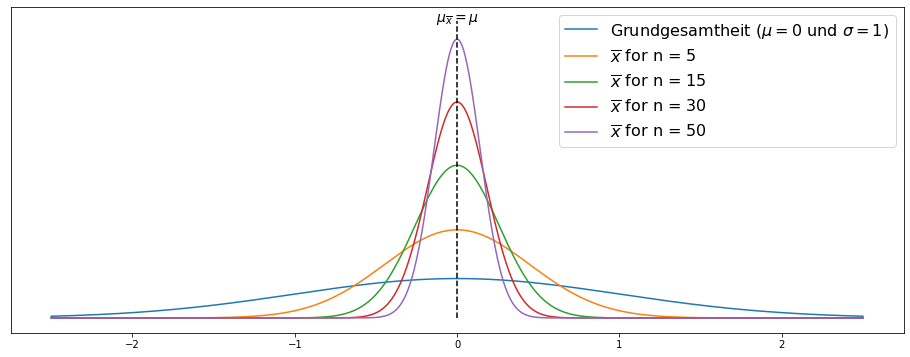

In [2]:
mu = 0
x = np.linspace(mu - 2.5, mu + 2.5, 1000)
n = [1, 5, 15, 30, 50]
fig, ax = plt.subplots(figsize=(16, 6))
for e, _n in enumerate(n):
    sigma = 1 / np.sqrt(_n)
    if _n == 1:
        label = "Grundgesamtheit ($\mu=0$ und $\sigma=1$)"
    else:
        label = "$\overline{x}$ for" + f" n = {_n}"
    ax.plot(x, norm.pdf(x, mu, sigma), label=label)
ax.legend(fontsize=16)
ax.text(x=mu, y=3, s="$\mu_\overline{x}=\mu$", size=14, ha="center")
ax.vlines(x=mu, ymin=0, ymax=3, color="k", linestyle="dashed")
ax.axes.yaxis.set_visible(False)

Es gibt zwei wichtige Beobachtungen bezüglich der Stichprobenverteilung von $\bar{x}$

1. Die Streuung der Stichprobenverteilung ist kleiner als die Streuung der entsprechenden Grundgesamtheitsverteilung. Mit anderen Worten: $\sigma_{\bar{x}}<\sigma$

2. Die Standardabweichung der Stichprobenverteilung nimmt mit zunehmendem Stichprobenumfang ab.

Um die $3$. Behauptung von oben, dass die Form der Stichprobenverteilung von $\bar{x}$ unabhängig vom Wert von $n$ normal ist, zu überprüfen, führen wir eine numerische Simulation durch. Für eine ausreichend große Anzahl von Versuchen (Versuche = $1000$) ziehen wir Stichproben aus der Standardnormalverteilung $N∼(\mu=0,\sigma=1)$, wobei jede einzelne Stichprobe einen Stichprobenumfang von $n=5,15,30,50$ hat. Für jede Stichprobe berechnen wir den Stichprobenmittelwert $\bar{x}$ und stellen die empirischen Wahrscheinlichkeiten dar. Anschließend vergleichen wir die empirische Verteilung dieser Wahrscheinlichkeiten mit den aus den obigen Gleichungen berechneten Stichprobenverteilungen.

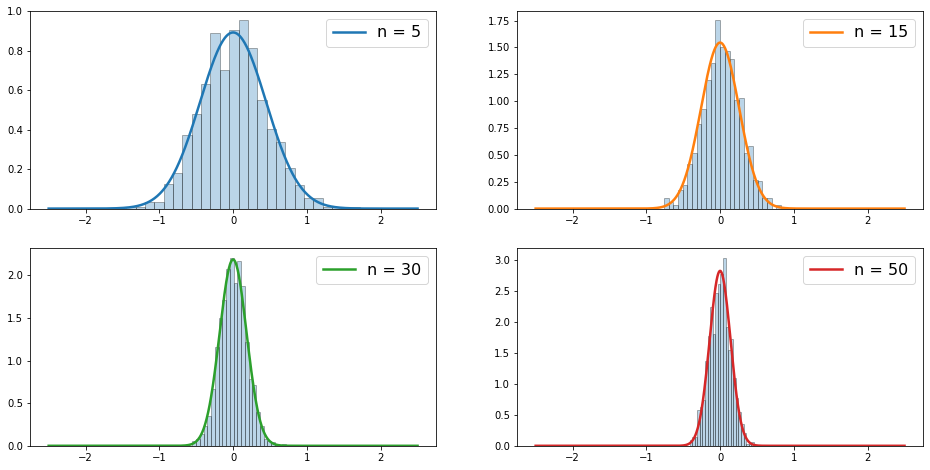

In [3]:
mu = 0
x = np.linspace(mu - 2.5, mu + 2.5, 1000)
n = [5, 15, 30, 50]
N = 1000
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
ax = np.ravel(axes)
np.random.seed(42)
for e, _n in enumerate(n):
    sigma = 1 / np.sqrt(_n)
    random_sample = norm.rvs(loc=mu, scale=sigma, size=N)
    ax[e].hist(random_sample, ec="black", density=True, bins=25, alpha=0.3)

    label = f"n = {_n}"
    ax[e].plot(x, norm.pdf(x, mu, sigma), label=label, color=f"C{e}", linewidth=2.5)
    ax[e].legend(fontsize=16)

Die Abbildung verifiziert die $3$. Behauptung von oben: Die Form der Stichprobenverteilung von $\bar{x}$ ist für jeden Wert von $n$ normal.

Darüber hinaus zeigt die Abbildung, dass die Verteilung der empirischen Wahrscheinlichkeiten (Balken) gut mit der Stichprobenverteilung (farbige Linie) übereinstimmt und dass die Standardabweichung der Stichprobenverteilung von $\bar{x}$ mit zunehmendem Stichprobenumfang abnimmt. Es sei daran erinnert, dass die $y$-Achse die *Dichte* darstellt, d. h. die **Wahrscheinlichkeit pro Einheitswert** der Zufallsvariablen. Aus diesem Grund kann die Wahrscheinlichkeitsdichte einen Wert größer als $1$ annehmen, aber nur über einen Bereich mit einer Größe kleiner als $1$.